<a href="https://colab.research.google.com/github/SharmaSensei/Machine-Learning-Tasks/blob/ml-tasks/Student_Grade_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Squared Error: 3.718379427871805
Mean Absolute Error: 2.995822784810126


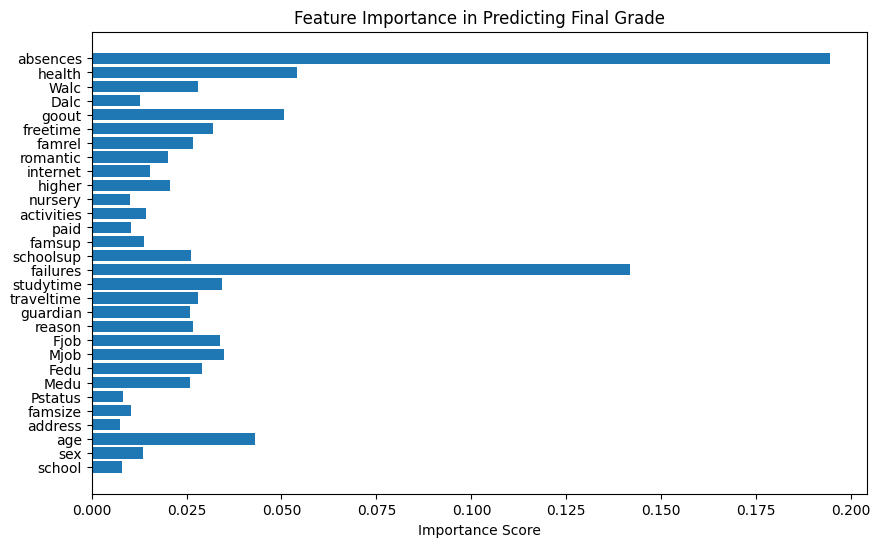

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Root Mean Squared Error (Tuned): 3.7978141636807794


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import zipfile
import urllib.request


# Download the ZIP file from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
urllib.request.urlretrieve(url, 'student.zip')

# Unzip the file
with zipfile.ZipFile('student.zip', 'r') as zip_ref:
    zip_ref.extractall()  # This will extract all files


# Load the dataset (you can change the path if needed)
data = pd.read_csv('student-mat.csv', sep=';')

# Display the first few rows of the dataset
data.head()

# Encode categorical variables
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher',
                       'internet', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Drop columns that may not affect the prediction significantly
data = data.drop(columns=['G1', 'G2'])  # Dropping G1 and G2 to focus on final grade

# Define the target (final grades G3) and features (X)
X = data.drop('G3', axis=1)
y = data['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using RMSE and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

# Get feature importance from the Random Forest model
importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance Score')
plt.title('Feature Importance in Predicting Final Grade')
plt.show()

# Optional: Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model using Grid Search
grid_search.fit(X_train, y_train)

# Best parameters from the Grid Search
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mse_tuned ** 0.5

print(f'Root Mean Squared Error (Tuned): {rmse_tuned}')


